# 词云练习

爬取网易云歌手及歌手id

In [4]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import requests
from bs4 import BeautifulSoup
import os

# 创建文件夹


def Create_folder(name):
    try:
        # 如果不存在则创建
        if r'D:\{}'.format(name) not in os.listdir():
            os.makedirs(r'D:\{}'.format(name))
    except:
        return ''

# 获取网页函数


def gethtmltext(url, headers, code='utf-8'):
    try:
        r = requests.get(url, headers=headers, timeout=30)
        r.raise_for_status()
        r.encoding = code
        html = r.text
        return html
    except:
        print('请求错误')
        return ''

# 获取歌手及ID写入文件


def get_artists(Singer_classification, initials, url, headers):

    # ,encoding="utf-8")#写入失败文件
    txtfile = open(r'D:\wangyiyun\error_artist_id.txt', 'a')
    # id 分类 姓名
    txtfile.write('artist_id, Singer_classification,artist_name\n')
    # 文件先不关 下面还要写

    # 不分类写入文件
    csvfile1 = open(r'D:\wangyiyun\artist_id.csv', 'a')
    # id 分类 姓名
    csvfile1.write('artist_id,Singer_classification,artist_name\n')
    # 文件先不关 下面还要写

    # 总进度
    zong_count = 0
    # 国家 歌手男女分类
    for i in Singer_classification:
        csvfile2 = open(r'D:\wangyiyun\{}artist_id.csv'.format(
            i[0]), 'a')  # 根据国家 歌手男女分类写入文件
        # id 姓名
        csvfile2.write('artist_id,artist_name\n')
        # 文件先不关 下面还要写

        print('\r总进度:{:.2f}%'.format(zong_count * 100 /
                                     len(Singer_classification)), end='')  # 总进度条
        zong_count += 1  # 总进度+1

        count = 1
        # 歌手首字母分类
        for j in initials:
            # print(i)
            url1 = url + 'cat?id=' + i[1] + '&initial=' + str(j)  # url地址拼接
            html = gethtmltext(url1, headers)  # 调用获取网页函数
            soup = BeautifulSoup(html, 'html5lib')  # 解析

            # 找歌手id及姓名
            for artist in soup.find_all('a', attrs={'class': 'nm nm-icn f-thide s-fc0'}):
                artist_name = artist.string  # 歌手名
                artist_id = artist['href'].replace(
                    '/artist?id=', '').strip()  # 歌手ID
                # print(artist_id,artist_name)
                try:
                    csvfile1.write('{},{},{}\n'.format(artist_id, i[0], artist_name.replace(
                        ',', '^%^').replace('，', '^%^')))  # 歌手ID和姓名写入不分类文件
                    csvfile2.write('{},{}\n'.format(artist_id, artist_name.replace(
                        ',', '^%^').replace('，', '^%^')))  # 歌手ID和姓名写入分类文件
                except Exception as msg:
                    # print(msg)
                    txtfile.write('{},{},{}\n'.format(artist_id, i[0], artist_name.encode("gbk", 'ignore').decode(
                        "gbk", "ignore").replace(',', '^%^').replace('，', '^%^')))  # 写入失败的歌手ID和姓名写入文件

            print('\r{}进度:{:.2f}%,   {}'.format(
                i[0], count * 100 / len(initials), url1), end='')  # 国家 歌手男女分类进度条
            count += 1  # 进度+1
        csvfile2.close()  # 关闭分类文件
    csvfile1.close()  # 关闭总文件
    txtfile.close()  # 关闭写入失败文件


def main():
    # state=[1,2,6,4,7]#'华语':'1','欧美': '2','日本': '6','韩国': '7','其他': '4',
    states = [['华语', '1'], ['欧美', '2'], ['日本', '6'],
              ['韩国', '7'], ['其他', '4']]  # 地区及代号
    # gender_group=[1,2,3]#'男':'1', '女': '2','组合': '3',
    gender_group = [['男', '1'], ['女', '2'], ['组合', '3']]  # 性别组合代号
    Singer_classification = []    # 歌手起名分类 歌手id
    for i in states:
        for j in gender_group:
            Create_folder('wangyiyun\{}{}'.format(i[0], j[0]))  # 创建分类文件夹
            Singer_classification.append(
                ['{}{}'.format(i[0], j[0]), '{}00{}'.format(i[1], j[1])])
    # print(Singer_classification)#地区类型组合列表

    initials = [x for x in range(65, 91)]  # 起始字母 A_Z
    initial_hot = -1  # 热门
    initial_other = 0  # 其他
    initials.append(initial_hot)
    initials.append(initial_other)
    # print(initials)#歌手首字母组合列表

    url = 'http://music.163.com/discover/artist/'  # 歌手地址
    headers = {'User-Agent': 'Mozilla/5.0'}
    get_artists(Singer_classification, initials, url, headers)


if __name__ == '__main__':
    main()

其他组合进度:100.00%,   http://music.163.com/discover/artist/cat?id=4003&initial=0

生成指定歌手的词云

/song?id=407450223    爸爸妈妈
/song?id=1407551413    麻雀
/song?id=1293886117    年少有为
/song?id=133998    老街
/song?id=518686034    戒烟
/song?id=1452439191    在一起嘛好不好
/song?id=31654343    不将就
/song?id=27731176    模特
/song?id=27678655    李白
/song?id=29710981    喜剧之王
/song?id=1318235595    耳朵
/song?id=1442031605    我爱你
/song?id=29764562    作曲家
/song?id=428375722    不说
/song?id=1418319771    歌曲：爸爸妈妈
/song?id=1460930236    要我怎么办
/song?id=29764563    不搭
/song?id=31877243    笑忘书 (Live)
/song?id=1308818966    王牌冤家 (Live)
/song?id=31134193    出卖
/song?id=1318234987    贝贝
/song?id=1430224832    等着等着就老了
/song?id=1466675564    如果我是海
/song?id=1415566662    两个普普通通小青年
/song?id=1410490187    老友记
/song?id=506092654    我看着你的时候
/song?id=27731174    老伴
/song?id=1449782659    花样年华
/song?id=1420575583    同根
/song?id=27731177    太坦白
/song?id=502242110    歌谣
/song?id=407450218    有理想
/song?id=29764561    落俗
/song?id=27731172    都一样
/song?id=31134170    小芳
/song?id=570334069    成长之重量
/song?id=31134197    边走边唱
/song?i

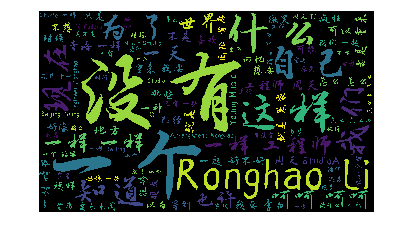

In [19]:
# -*- coding:utf-8 -*-
# 网易云音乐 通过歌手ID，生成该歌手的词云

import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree

headers = {
    'Referer': 'http://music.163.com',
    'Host': 'music.163.com',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'User-Agent': 'Chrome/10'
}

# 得到某一首歌的歌词


def get_song_lyric(headers, lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
        try:
            lyric = res.json()['lrc']['lyric']
            new_lyric = re.sub(r'[\d:.[\]]', '', lyric)
            return new_lyric
        except:
            print('发生了异常-----------------------------------', lyric_url)
            return ''
    else:
        return ''
#         print(res.json())

# 去掉停用词


def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理',
                  'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed',
                  '后期', '吉他', '处理', '工作室','导演','母带','贝斯','编写','北京','上海','李荣浩']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

# 生成词云


def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f, cut_all=False, HMM=True))
    wc = WordCloud(
        scale=8,
        font_path="./wc.ttf",
        max_words=100,
        width=2000,
        height=1200,
    )
    print(cut_text)
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    # plt.savefig("wordcloud.jpg", dpi=600)
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# 得到指定歌手页面 热门前50的歌曲ID，歌曲名


def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id
    # 获取网页HTML
    res = requests.request('GET', page_url, headers=headers)
    # 用XPath解析 前50首热门歌曲
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)
    # 设置热门歌曲的ID，歌曲名称
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
        song_ids.append(href[9:])
        song_names.append(name)
        print(href, '  ', name)
    return song_ids, song_names


# 设置歌手ID，李荣浩为4292
artist_id = '4292'
[song_ids, song_names] = get_songs(artist_id)
# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + \
        song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    print(song_name)
# 根据词频 生成词云
create_word_cloud(all_word)